# Intro to geopandas

python library for geospatial data. 

Import it with its standard abbreviation

In [1]:
import geopandas as gpd

# used for making maps
import matplotlib.pyplot as plt

## Data

We will use simplified data about wild pig sightings in California. 
Data is from the global biodiversity information facility (GBIF). 

Read in the data in a shapefile using the geopandas function gpd.read_file()

In [2]:
# read in the data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

In [3]:
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## Geoseries and Geodataframe

core structure is geopandas geodataframe

geodataframe is a pandas dataframe with a dedicated geometry column.

The geometry column in the geopandas geodataframe holds the geometry of each spatial feature. This column is of type geopandas.geoseries.

The other non-geometry columns are our usual pandas series type.

In [4]:
# type of pigs dataframe
print(type(pigs))

# type of geometry column
print(type(pigs.geometry))

# type of gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is reflected in the datatypes

In [5]:
# check the datatypes of each of our variables
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## geometric information

Two other important attributes of a gpd.geodataframe are its coordinate reference system and its extent

In [6]:
# access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The extent of the geodataframe tell us the bounding box covering all of the features in the geodataframe

We access information to create the extent using the total_bounds attribute

In [8]:
# retrieve the bounding box
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## data wrangling

geopandas is built on top of pandas, so almost everything about pandas data still applies here

Say we only want to use recent data for wild pig observations

In [10]:
# what years
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

Use our usual data selection

In [11]:
# select datat from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original dataframe and length of the subset
print(len(pigs))
print(len(pigs_recent))

1046
606


## plotting

geodataframe has a plot method to create a quick view of the data

geospatial information will be automatically used

<AxesSubplot:>

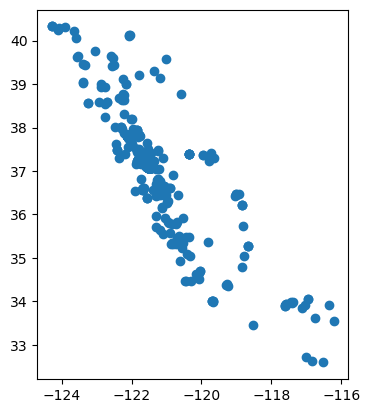

In [12]:
pigs_recent.plot()

### matplotlib
We use matplotlib to create more complex, customized graphs. In particular, maps

We can interact with matplotlib via its pyplot interface

graphs the data in a figure, which have one or more axes

the axis is only the area specified by the x,y axis and what is plotted in it. to initialize a blank figure:

1. initialize a blank figure and axis by calling pyplot's subplots function
2. show the graph using plt.show()

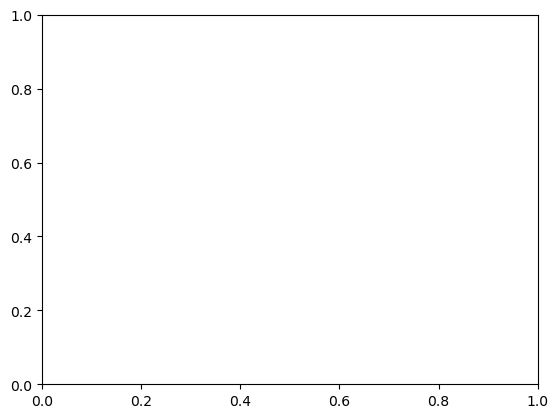

In [13]:
# create a blank figure and an empty axis
fig,ax = plt.subplots()

# display figure
plt.show()

## adding a layer

when using matplotlib, it can be useful to think of creating a plot as adding layers to an axis

general syntax to plot the dataframe is 

```python
# create a new figure
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax = ax,
       )

# display the figure
plt.show()
```

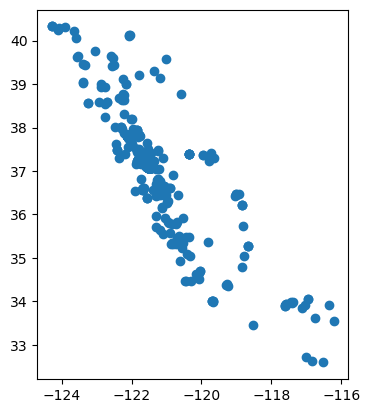

In [14]:
# create a new figure and axis
fig, ax = plt.subplots()

# add pigs point plot
pigs_recent.plot(ax = ax)

# display the figure
plt.show()

### customization

basic customization:

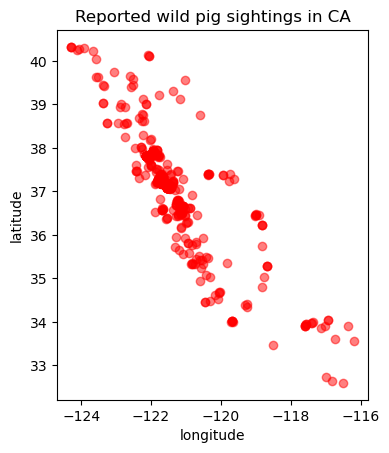

In [15]:
# initialize an empty figure
fig,ax = plt.subplots()

# add data to axis
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = 'red')

# customization separate from the data plotting
ax.set_title('Reported wild pig sightings in CA')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

# display figure
plt.show()

## exercise

1. Open the CA boundary shapefile
2. add it to the pig sightings graph so that the california boundary appears behind the points

In [20]:
# read in the CA boundary
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

In [48]:
# check the number of features
ca_boundary.shape

# check the geometry, what kind of vector data
ca_boundary.geom_type

0    MultiPolygon
dtype: object

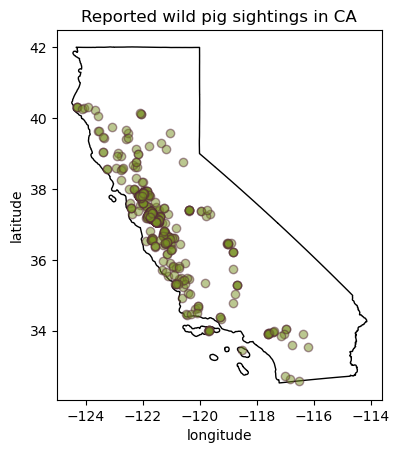

In [50]:
# add it the pigs plot 
# initialize an empty figure
fig,ax = plt.subplots()

# add data to axis
ca_boundary.plot(ax = ax,
                color = 'none')
pigs_recent.plot(ax = ax,
                alpha = 0.5,
                color = '#789123',
                edgecolor = '#562839')

# customization separate from the data plotting
ax.set_title('Reported wild pig sightings in CA')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

# display figure
plt.show()